<a href="https://colab.research.google.com/github/anilbhatt1/Deep_Learning_EVA4_Phase1/blob/master/S13_Opencv_Yolo_Selfie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from datetime import datetime 
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-04-22 17:52:51.091900


In [0]:
import cv2
import numpy as np

In [11]:
opencv_version_needed = "4.1.1.26"
if cv2.__version__ != opencv_version_needed:
   !pip install opencv-python==4.1.1.26

In [12]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-04-22 17:11:11--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M   323KB/s    in 10m 14s 

2020-04-22 17:21:25 (395 KB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



In [13]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5901, done.
remote: Total 5901 (delta 0), reused 0 (delta 0), pack-reused 5901
Receiving objects: 100% (5901/5901), 6.17 MiB | 11.59 MiB/s, done.
Resolving deltas: 100% (3920/3920), done.


In [15]:
cd darknet/cfg

/content/darknet/cfg


In [0]:
# Load Yolo
net = cv2.dnn.readNet("/content/yolov3.weights.1", "/content/darknet/cfg/yolov3.cfg")

In [0]:
classes = []
with open("/content/darknet/data/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [0]:
img_list = ["/content/darknet/data/dog.jpg",
            "/content/darknet/data/eagle.jpg",
            "/content/darknet/data/horses.jpg",
            "/content/darknet/data/giraffe.jpg",
            "/content/Yolo_Selfie_Mod4.jpg"]

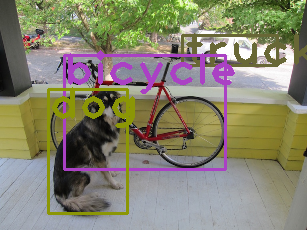

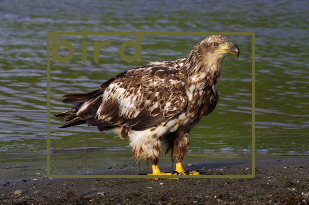

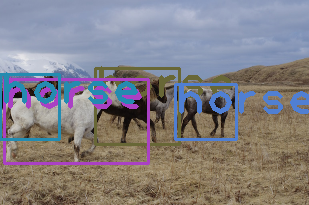

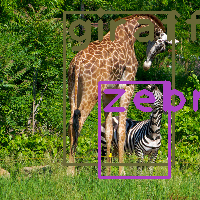

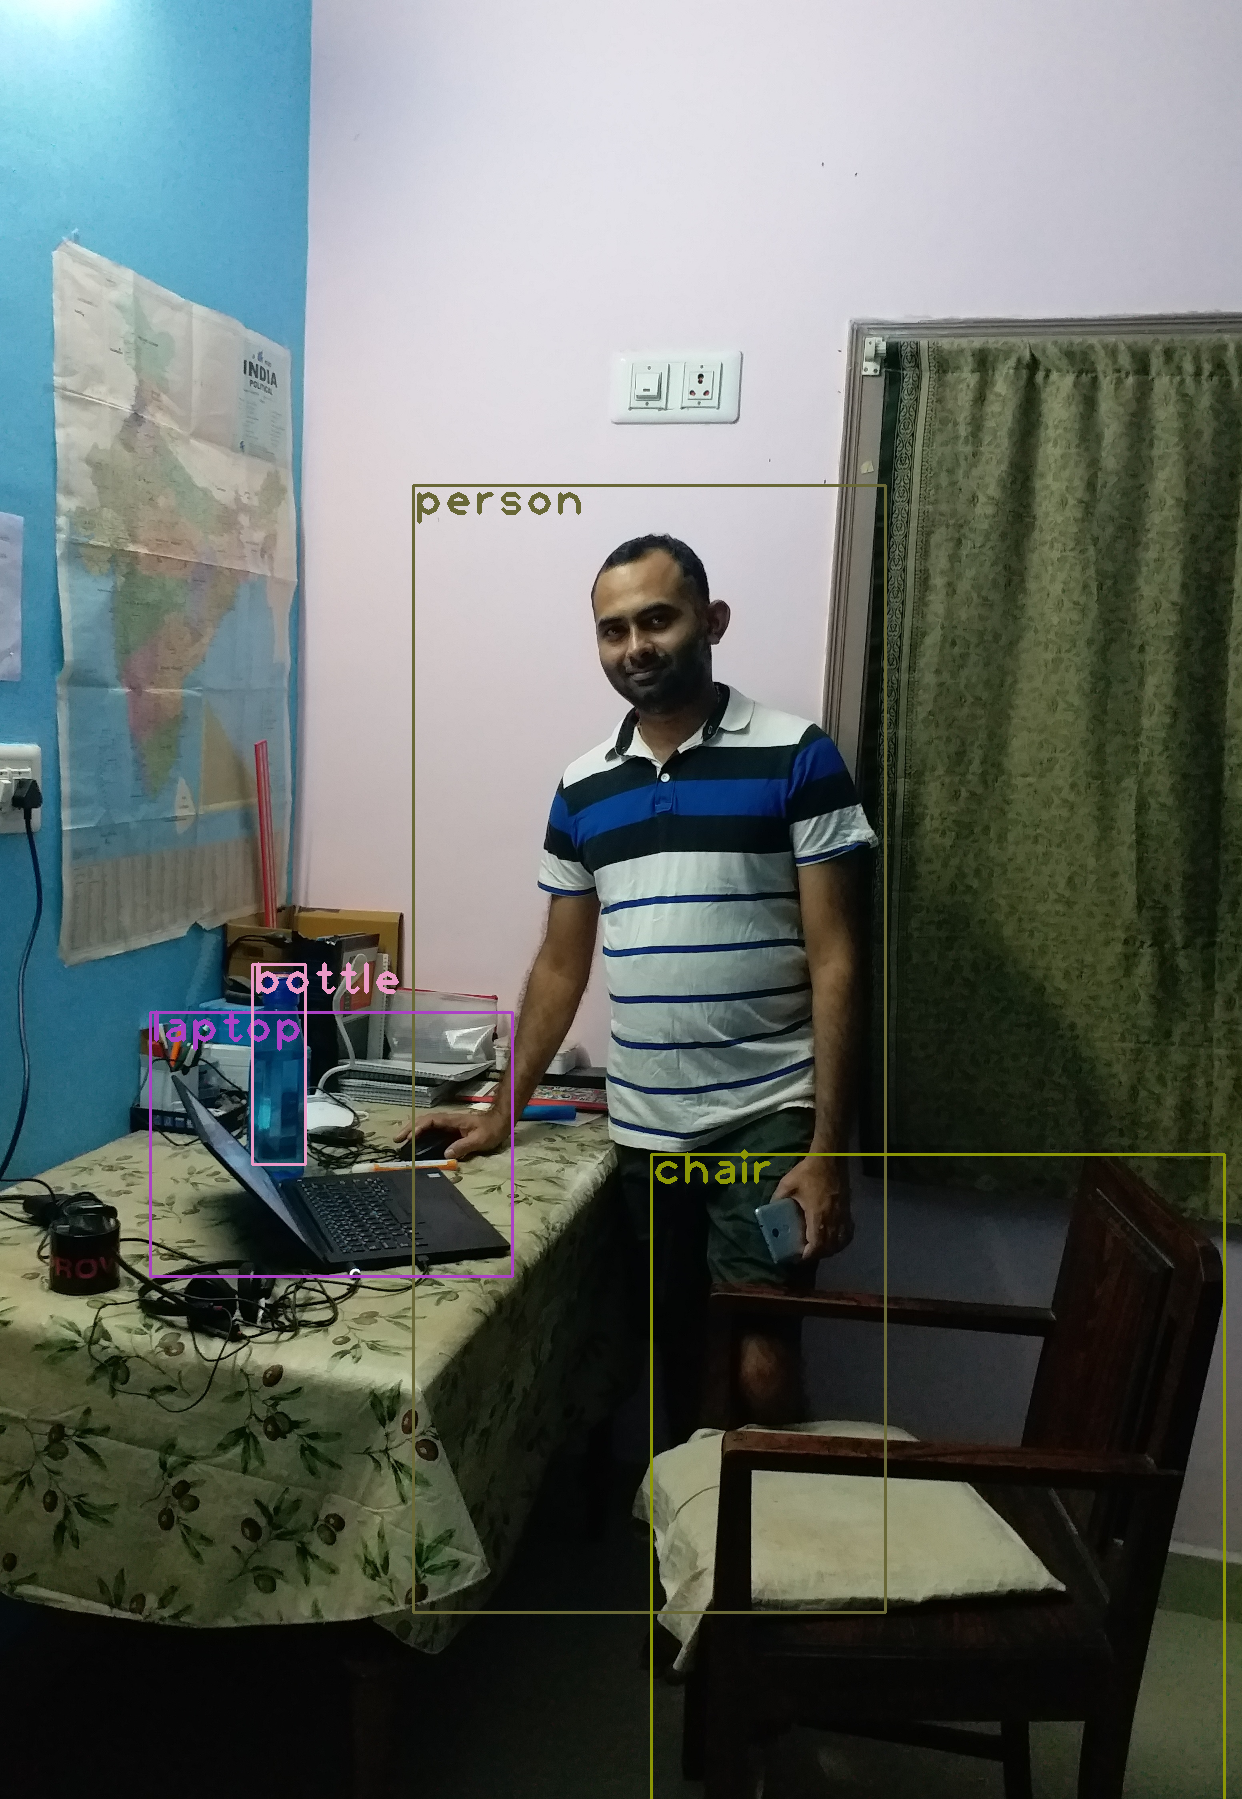

In [55]:
for i in range(len(img_list)):
    # Loading image
    img = cv2.imread(img_list[i])
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    #print(indexes)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
          if i in indexes:
              x, y, w, h = boxes[i]
              label = str(classes[class_ids[i]])
              color = colors[i]
              cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
              cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

    from google.colab.patches import cv2_imshow
    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()        
